# Import Modules 

In [3]:
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#to ingore warnings
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve

# Loading Data

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
print(train.shape)
train.head()

(54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
print(test.shape)
test.head()

(23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
#train = train.drop(['region', 'recruitment_channel'], axis=1)
#test = test.drop(['region', 'recruitment_channel'], axis=1)

In [10]:
def bar_plot(variable):
    # get feature
    var = train[variable]
    # count number of categorical variable (value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (12,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

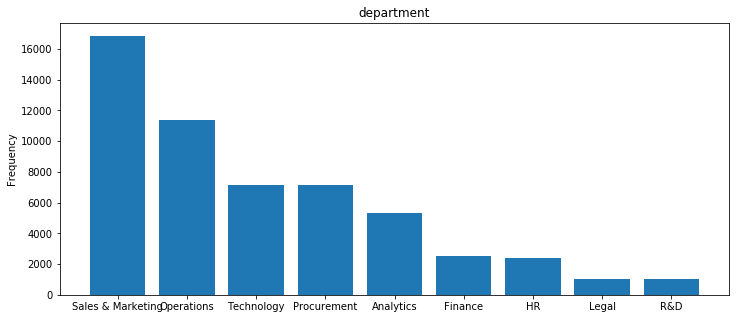

department: 
 Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64


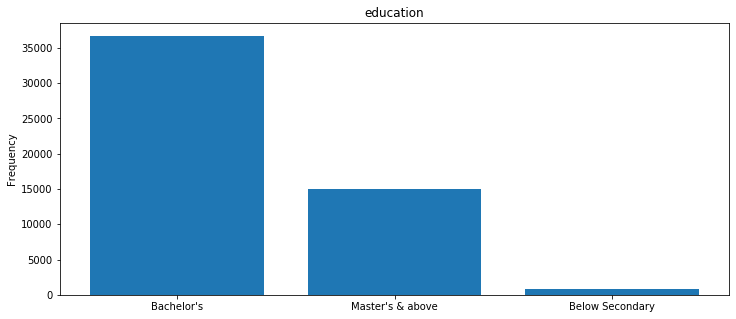

education: 
 Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


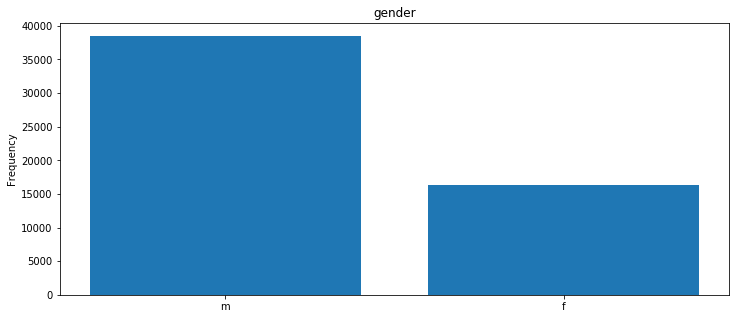

gender: 
 m    38496
f    16312
Name: gender, dtype: int64


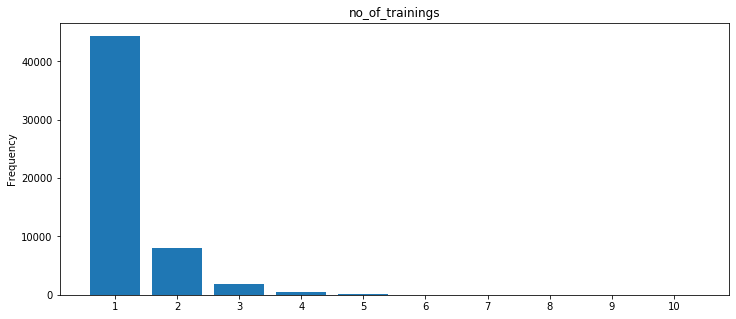

no_of_trainings: 
 1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64


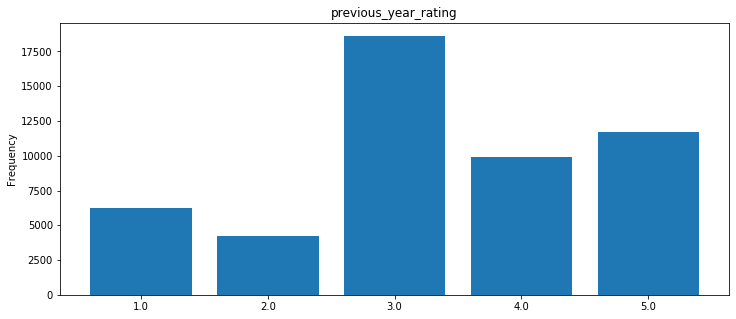

previous_year_rating: 
 3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


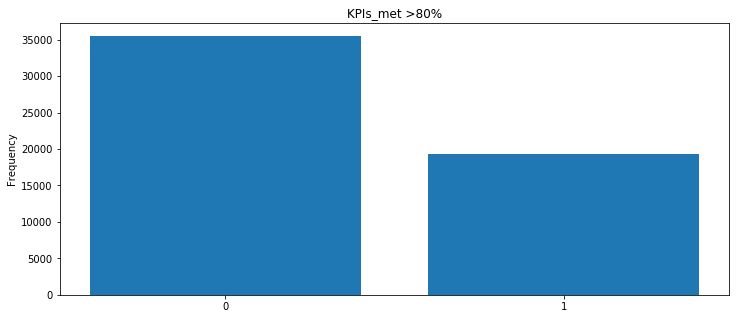

KPIs_met >80%: 
 0    35517
1    19291
Name: KPIs_met >80%, dtype: int64


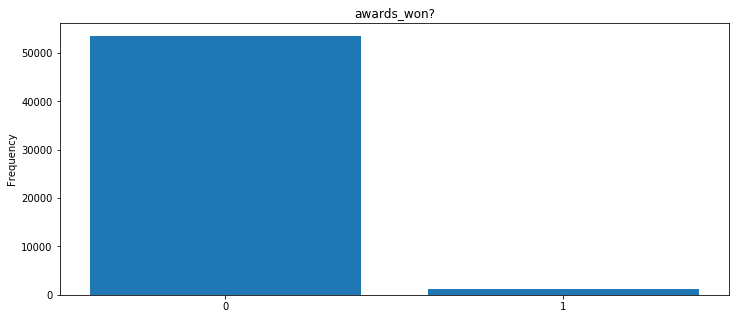

awards_won?: 
 0    53538
1     1270
Name: awards_won?, dtype: int64


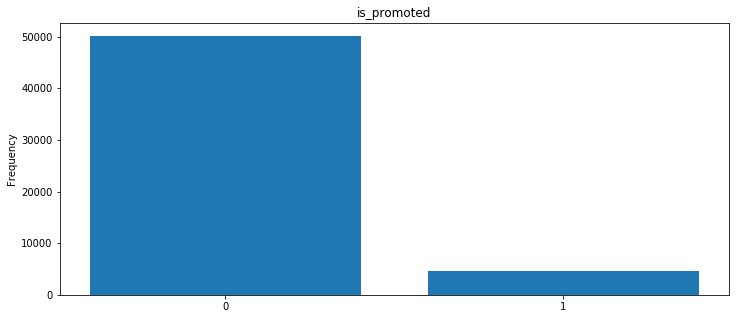

is_promoted: 
 0    50140
1     4668
Name: is_promoted, dtype: int64


In [11]:
categori1 = ["department","education","gender","no_of_trainings","previous_year_rating","KPIs_met >80%","awards_won?","is_promoted"]
for c in categori1:
    bar_plot(c)

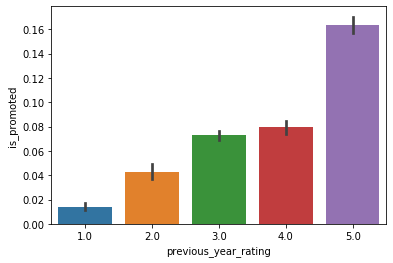

In [12]:
sns.barplot(x='previous_year_rating', y='is_promoted',data=train)

In [13]:
train.groupby("previous_year_rating")['is_promoted'].value_counts().unstack()

is_promoted,0,1
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,17263,1355
4.0,9093,784
5.0,9820,1921


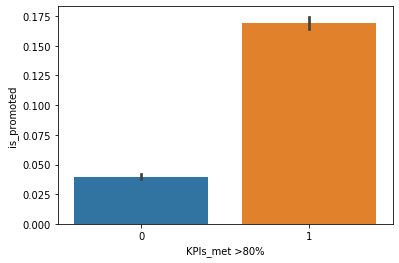

In [14]:
sns.barplot(x='KPIs_met >80%', y='is_promoted',data=train)

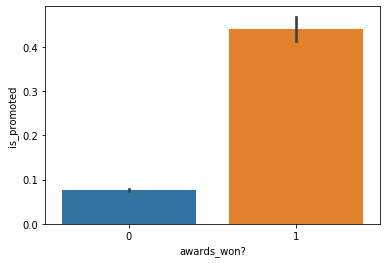

In [15]:
sns.barplot(x='awards_won?', y='is_promoted',data=train)

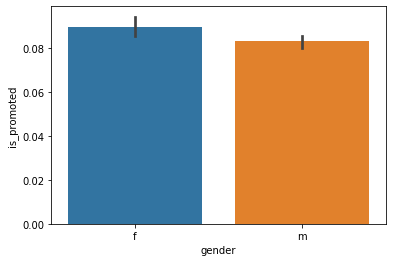

In [16]:
sns.barplot(x='gender', y='is_promoted',data=train)

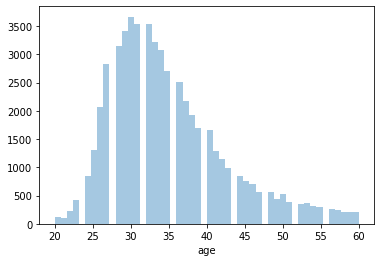

In [18]:
sns.distplot((train['age'].dropna()), kde=False)

In [19]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [20]:
train["previous_year_rating"].fillna(train["previous_year_rating"].mode()[0], inplace = True)
train["education"].fillna(train["education"].mode()[0], inplace = True)

In [21]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [22]:
train.head(25)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


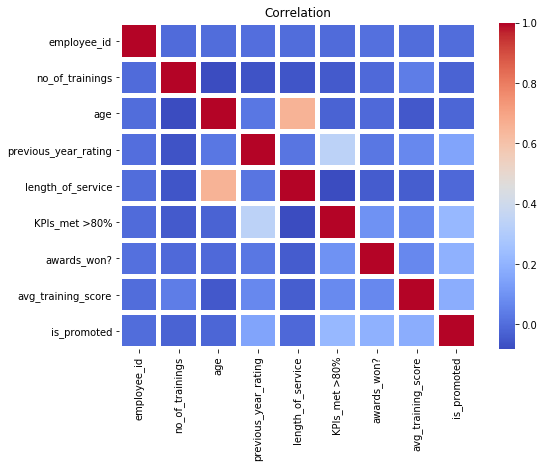

In [23]:
corr = train.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, cmap = "coolwarm", linewidth = 4, linecolor = "white")
plt.title("Correlation")
plt.show()

In [24]:
# Convert categorical to dummies
def convert_categorical_to_dummies(df):
    list_to_drop = []
    for col in df.columns:
        if df[col].dtype == 'object':
            print("Converting....", col)
            list_to_drop.append(col)
            df = pd.concat([df, pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    return df, list_to_drop

In [25]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [26]:
# Convert data to dummy variables
processed_data, list_to_drop = convert_categorical_to_dummies(train)
print("Total shape of Data :", processed_data.shape)
print("Columns which need to be dropped :", list_to_drop)
processed_data = processed_data.drop(list_to_drop, axis = 1)
print("Total shape of Data :", processed_data.shape)

train_xs = processed_data.drop(['employee_id',"is_promoted"],axis=1)
labels = train["is_promoted"]

Converting.... department
Converting.... region
Converting.... education
Converting.... gender
Converting.... recruitment_channel
Total shape of Data : (54808, 60)
Columns which need to be dropped : ['department', 'region', 'education', 'gender', 'recruitment_channel']
Total shape of Data : (54808, 55)


In [27]:
# Build Tree
from sklearn import tree
from sklearn.datasets import load_iris

clf = tree.DecisionTreeClassifier()
#clf = clf.fit(iris.data, iris.target)
import graphviz

In [28]:
# XGBOOST
xgb_model = xgb.XGBClassifier()
print(xgb_model)

f1_scores = cross_val_score(xgb_model, train_xs, labels, cv=5, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ", np.mean(f1_scores))

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
F1-score =  [0.51726784 0.49462366 0.51529052 0.54131918 0.51266309]  Mean F1 score =  0.5162328571231558


In [29]:
xgb_model.fit(train_xs, labels)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [30]:
# Create parameters to search
params = {
     'learning_rate': [0.01],
     'n_estimators': [900, 1000, 1100],
     'max_depth':[7,8,9],
     'reg_alpha':[0.3, 0.4, 0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = xgb.XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=2,
                    n_jobs=2)
 
gsearch.fit(train_xs, labels)
 
#Printing the best chosen params
print("Best Parameters :",gsearch.best_params_)
 
params = {'objective':'binary:logistic', 'booster':'gbtree'}
 
# Updating the parameter as per grid search
params.update(gsearch.best_params_)
 
# Initializing the XGBoost Regressor
xgb_model = xgb.XGBClassifier(**params)
print(xgb_model)
 
# Cross validation scores
f1_scores = cross_val_score(xgb_model, train_xs, labels, cv=5, scoring='f1',n_jobs=2)
print("F1_scores per fold : ",f1_scores," \nMean F1_score= ", np.mean(f1_scores))
 
# Fitting model on tuned parameters
xgb_model.fit(train_xs, labels)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 56.8min
[Parallel(n_jobs=2)]: Done  54 out of  54 | elapsed: 68.7min finished


Best Parameters : {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'reg_alpha': 0.5}
XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=8,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=0.5,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
F1_scores per fold :  [0.50509804 0.48151062 0.49528302 0.52484472 0.50776398]  
Mean F1_score=  0.5029000750587226


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.5,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

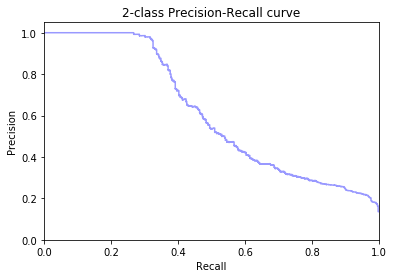

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train_xs, labels, test_size=0.10, stratify=labels)
xgb_model = xgb.XGBClassifier(**params)

# Training the models
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])
thresholds = np.append(thresholds, 1)

f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.25283342599868774
Max F1-score at cut-off :  0.5343320848938826


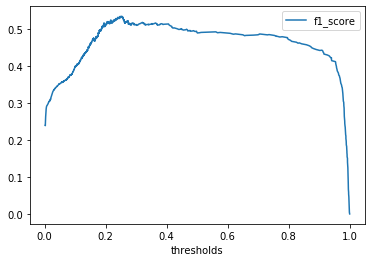

In [76]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [31]:
# Create submission file
test = pd.read_csv("test.csv")
# Missing treatment
values = {"previous_year_rating":3, "education":"Bachelor's"}
test.fillna(value=values, inplace=True)

# Convert data to dummy variables
processed_data, list_to_drop = convert_categorical_to_dummies(test)
print("Total shape of Data :", processed_data.shape)
print("Columns which need to be dropped :", list_to_drop)
processed_data = processed_data.drop(list_to_drop, axis = 1)
print("Total shape of Data :", processed_data.shape)

# Removing the id attributes
test_data = processed_data.drop(['employee_id'],axis=1)
y_pred = xgb_model.predict_proba(test_data)

Converting.... department
Converting.... region
Converting.... education
Converting.... gender
Converting.... recruitment_channel
Total shape of Data : (23490, 59)
Columns which need to be dropped : ['department', 'region', 'education', 'gender', 'recruitment_channel']
Total shape of Data : (23490, 54)


In [32]:
predictions = (y_pred[:,1] >= 0.24252495169639587).astype("int") # 0.5158371040723982.
submission_df = pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':predictions})
submission_df.to_csv("XGB_tuned_model_1.csv", index=False)